In [42]:
import binascii

import numpy as np
import scipy
import scipy.cluster
import scipy.misc
from PIL import Image


import numpy as np
from sklearn.cluster import KMeans
import binascii

def get_dominant_color(im):
    NUM_CLUSTERS = 5
    
    print('reading image')
    im = im.resize((50, 50))      # optional, to reduce time
    ar = np.asarray(im)
    shape = ar.shape
    ar = ar.reshape(np.prod(shape[:2]), shape[2]).astype(float)  # np.prod instead of scipy.product
    
    print('finding clusters')
    # Use sklearn.cluster.KMeans instead of scipy.cluster.vq.kmeans
    kmeans = KMeans(n_clusters=NUM_CLUSTERS, random_state=42, n_init=10)
    kmeans.fit(ar)
    codes = kmeans.cluster_centers_
    labels = kmeans.labels_
    
    print('cluster centres:\n', codes)
    
    # Count occurrences using numpy
    counts, bins = np.histogram(labels, bins=NUM_CLUSTERS)
    
    index_max = np.argmax(counts)  # np.argmax instead of scipy.argmax
    peak = codes[index_max]
    colour = binascii.hexlify(bytearray(int(c) for c in peak)).decode('ascii')
    print('most frequent is %s (#%s)' % (peak, colour))
    
    return peak, colour

import matplotlib.pyplot as plt

def show_color(hex_color, size=(4, 4), title=True):
    """
    Display a hex color using matplotlib
    
    Parameters:
    hex_color (str): Hex color code (e.g., "#FF5733" or "FF5733")
    size (tuple): Figure size (width, height)
    title (bool): Whether to show the hex code as title
    """
    # Add '#' prefix if missing
    if not hex_color.startswith('#'):
        hex_color = '#' + hex_color
    
    plt.figure(figsize=size)
    plt.fill([0, 1, 1, 0], [0, 0, 1, 1], color=hex_color)
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.axis('off')
    
    if title:
        plt.title(f"Color: {hex_color}", fontsize=12)
    
    plt.show()

def crop_center(im):
    width, height = im.size
    left = (width - 200) / 2
    top = (height - 200) / 2
    right = (width + 200) / 2
    bottom = (height + 200) / 2
    return im.crop((left, top, right, bottom))

def iterate_over_images(image_paths):
    for image_path in image_paths:
        with PIL.Image.open(image_path) as im:
            plt.imshow(im)
            plt.show()
            im = crop_center(im)
            peak, color = get_dominant_color(im)
            show_color(color)
            print(f"Analyzing: {image_path.split('/')[-1]}")
            print(f"{'='*50}")

            with PIL.Image.open(image_path) as i:
                print(f"Analyzing: {image_path.split('/')[-1]}")

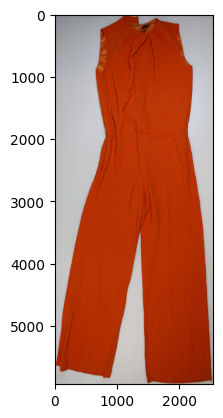

reading image
finding clusters
cluster centres:
 [[183.67161572  51.35633188   3.130131  ]
 [163.25125628  39.83417085   1.42211055]
 [171.78181818  46.29090909   3.01212121]
 [179.26356589  50.60206718   3.2118863 ]
 [185.81788079  51.80463576   4.02483444]]
most frequent is [183.67161572  51.35633188   3.130131  ] (#b73303)


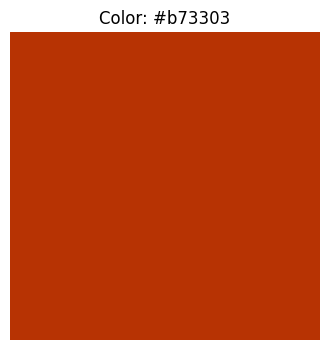

Analyzing: cropped_orange.JPG
Analyzing: cropped_orange.JPG


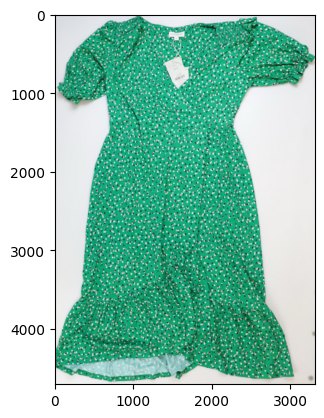

reading image
finding clusters
cluster centres:
 [[209.70522388 214.39179104 209.60447761]
 [ 21.36450268 172.0970816  122.92078618]
 [ 30.67052023  86.13294798  94.02890173]
 [ 79.56060606 173.66161616 141.66161616]
 [146.06043956 191.51098901 173.99450549]]
most frequent is [ 21.36450268 172.0970816  122.92078618] (#15ac7a)


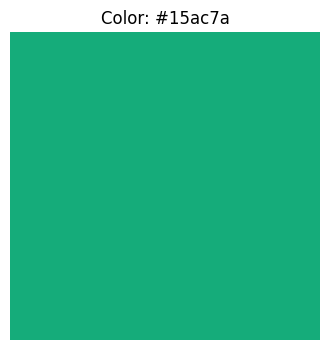

Analyzing: cropped_green.JPG
Analyzing: cropped_green.JPG


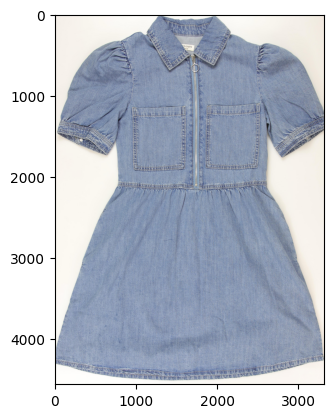

reading image
finding clusters
cluster centres:
 [[136.65581854 153.30670611 180.14201183]
 [113.41397849 128.29032258 156.58064516]
 [126.58926174 143.43758389 171.31006711]
 [148.71367521 164.53846154 188.81623932]
 [ 86.63218391  94.57471264 119.82758621]]
most frequent is [136.65581854 153.30670611 180.14201183] (#8899b4)


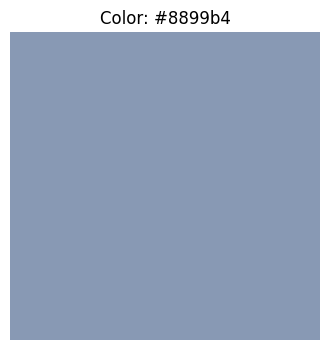

Analyzing: cropped_blue.JPG
Analyzing: cropped_blue.JPG


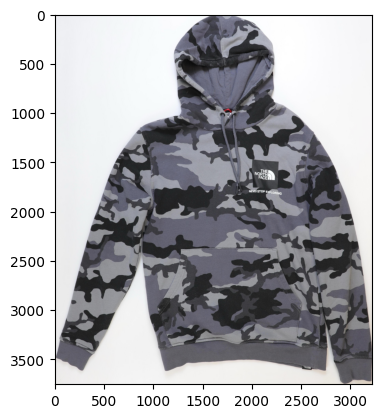

reading image
finding clusters
cluster centres:
 [[ 64.70659107  64.88447909  70.72076541]
 [158.9030837  159.59471366 167.75770925]
 [102.38392857 102.15178571 114.88392857]
 [ 37.74305556  38.8625      40.73472222]
 [131.26666667 131.5        139.13333333]]
most frequent is [64.70659107 64.88447909 70.72076541] (#404046)


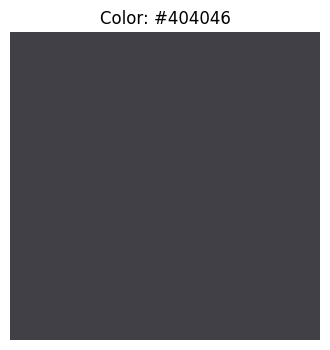

Analyzing: cropped_gray1.JPG
Analyzing: cropped_gray1.JPG


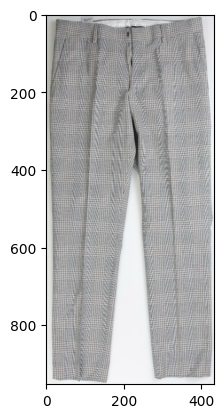

reading image
finding clusters
cluster centres:
 [[205.57017544 206.92105263 205.61403509]
 [236.46382979 239.42553191 240.43829787]
 [169.74979887 170.06355591 170.38294449]
 [129.55263158 129.99122807 129.55263158]
 [156.44836272 157.24811083 157.72921914]]
most frequent is [169.74979887 170.06355591 170.38294449] (#a9aaaa)


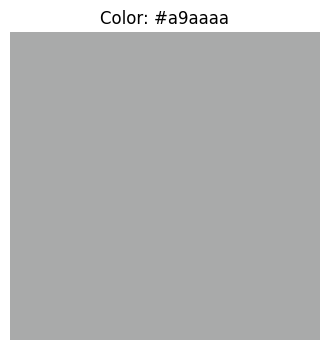

Analyzing: cropped_gray3.JPG
Analyzing: cropped_gray3.JPG


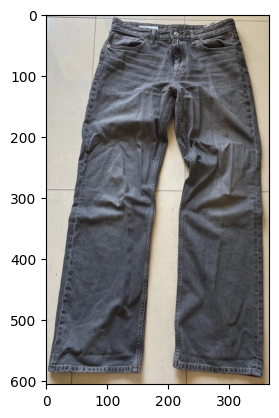

reading image
finding clusters
cluster centres:
 [[105.09310345 108.82413793 118.99827586]
 [223.15555556 216.2345679  199.57777778]
 [ 80.39809297  81.77115614  89.0011919 ]
 [ 57.80042918  54.79828326  53.8111588 ]
 [141.70952381 142.57142857 146.25238095]]
most frequent is [80.39809297 81.77115614 89.0011919 ] (#505159)


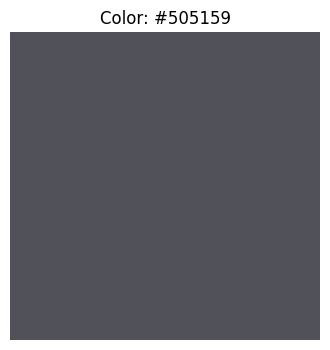

Analyzing: cropped_gray2.jpeg
Analyzing: cropped_gray2.jpeg


In [43]:
iterate_over_images(
    [
        "/Users/somogyijanos/Repos/somogyijanos/smartrobe/cropped_orange.JPG",
        "/Users/somogyijanos/Repos/somogyijanos/smartrobe/cropped_green.JPG",
        "/Users/somogyijanos/Repos/somogyijanos/smartrobe/cropped_blue.JPG",
        "/Users/somogyijanos/Repos/somogyijanos/smartrobe/cropped_gray1.JPG",
        "/Users/somogyijanos/Repos/somogyijanos/smartrobe/cropped_gray3.JPG",
        "/Users/somogyijanos/Repos/somogyijanos/smartrobe/cropped_gray2.jpeg",
    ]
)
